### Install Required Libararies(TenSEAL Library)

In [86]:
!pip install tenseal

### Import Necessary Libraries

In [87]:
import torch
import tenseal as ts
import pandas as pd
import random
from time import time

# those are optional and are not necessary for training
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

## Data Preprocessing

In [88]:
data = pd.read_csv("/content/heart_disease.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Descriptive Statistics of the Plain Data

In [89]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Handling Null Values

In [91]:
data.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [92]:
# drop rows with missing values
data = data.dropna()

In [93]:
data.shape

(3656, 16)

In [94]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

###Correlation Analysis

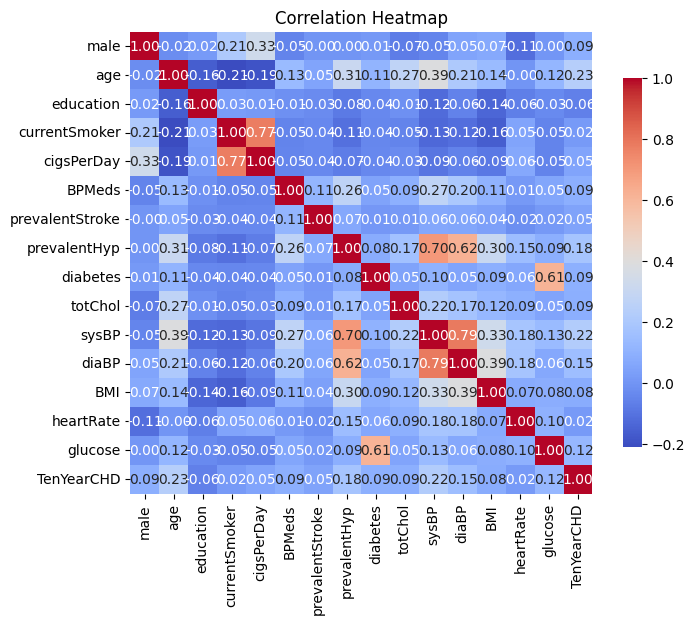

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [96]:
selected_features = ["male", "age", "cigsPerDay", "prevalentStroke", "prevalentHyp", "totChol", "sysBP", "heartRate", "glucose"]
data[selected_features].head()


,male,age,cigsPerDay,prevalentStroke,prevalentHyp,totChol,sysBP,heartRate,glucose
0,1,39,0.0,0,0,195.0,106.0,80.0,77.0
1,0,46,0.0,0,0,250.0,121.0,95.0,76.0
2,1,48,20.0,0,0,245.0,127.5,75.0,70.0
3,0,61,30.0,0,1,225.0,150.0,65.0,103.0
4,0,46,23.0,0,0,285.0,130.0,85.0,85.0


### Data Loading, PreProcesing and Splitting


In [97]:
torch.random.manual_seed(73)

def split_train_test(x, y, test_ratio=0.3):
    idxs = [i for i in range(len(x))]
    random.shuffle(idxs)
    delim = int(len(x) * test_ratio)
    test_idxs, train_idxs = idxs[:delim], idxs[delim:]
    return x[train_idxs], y[train_idxs], x[test_idxs], y[test_idxs]

def heart_disease_data(data):
    # drop some features
    data = data.drop(columns=["education", "currentSmoker", "BPMeds", "diabetes", "diaBP", "BMI"])
    # balance data
    grouped = data.groupby('TenYearCHD')
    data = grouped.apply(lambda x: x.sample(n=grouped.size().min(), random_state=73).reset_index(drop=True)[x.columns])
    # extract labels
    y = torch.tensor(data["TenYearCHD"].values).float().unsqueeze(1)
    data = data.drop("TenYearCHD", axis=1)  # Corrected line
    # standardize data
    data = (data - data.mean()) / data.std()
    x = torch.tensor(data.values).float()
    print(data.shape)
    return split_train_test(x, y)

# You can use whatever data you want without modification to the tutorial
x_train, y_train, x_test, y_test = heart_disease_data(data)

print("############# Data summary #############")
print(f"x_train has shape: {x_train.shape}")
print(f"y_train has shape: {y_train.shape}")
print(f"x_test has shape: {x_test.shape}")
print(f"y_test has shape: {y_test.shape}")
print("#######################################")

(1114, 9)
############# Data summary #############
x_train has shape: torch.Size([780, 9])
y_train has shape: torch.Size([780, 1])
x_test has shape: torch.Size([334, 9])
y_test has shape: torch.Size([334, 1])
#######################################


<ipython-input-97-7ed21b43927c>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = grouped.apply(lambda x: x.sample(n=grouped.size().min(), random_state=73).reset_index(drop=True)[x.columns])


In [98]:
print(x_train.numpy()[:5])

[[-0.9573716   1.195423   -0.7572338  -0.09020801 -0.80004555  0.00767767
   0.3268067  -1.0488634  -0.2930886 ]
 [-0.9573716  -0.08405237 -0.26636475 -0.09020801 -0.80004555 -1.0945028
  -0.22384547  1.3348567   0.48303738]
 [-0.9573716   1.0791072  -0.7572338  -0.09020801 -0.80004555  0.47059348
  -0.52976334 -1.7064414  -0.04472826]
 [-0.9573716   1.0791072  -0.7572338  -0.09020801 -0.80004555  1.5948176
  -0.01990022 -0.39128545  0.01736181]
 [-0.9573716  -0.78194803 -0.7572338  -0.09020801 -0.80004555 -1.8660293
  -0.85607576 -0.3090882  -0.07577331]]


In [99]:
print(y_train.numpy()[:5])

[[0.]
 [0.]
 [1.]
 [1.]
 [0.]]


## Model Training and Evaluation on Plain Data

### Logistic Regression Model Definition

In [100]:
class LR(torch.nn.Module):

    def __init__(self, n_features):
        super(LR, self).__init__()
        self.lr = torch.nn.Linear(n_features, 1)

    def forward(self, x):
        out = torch.sigmoid(self.lr(x))
        return out

### Model Initialization, Optimizer, and Loss Function



In [101]:
n_features = x_train.shape[1]
model = LR(n_features)
# use gradient descent with a learning_rate=1
optim = torch.optim.SGD(model.parameters(), lr=1)
# use Binary Cross Entropy Loss
criterion = torch.nn.BCELoss()

### Define Accuracy Funtion

In [102]:
def accuracy(model, x, y):
    out = model(x)
    correct = torch.abs(y - out) < 0.5
    return correct.float().mean()

### Training Non-Encrypted Model with Non-Encrypted Data
#####*Tracking Accuracy and Loss*


In [103]:
EPOCHS = 5
plain_train_accuracy = []

def train(model, optim, criterion, x, y, epochs=EPOCHS):
    for e in range(1, epochs + 1):
        optim.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optim.step()

        # Calculate accuracy
        acc = accuracy(model, x_train, y_train)

        # Log the results
        print(f"Loss at epoch {e}: {loss.data}, Accuracy: {acc}")
        plain_train_accuracy.append(acc)
    return model

model = train(model, optim, criterion, x_train, y_train)


Loss at epoch 1: 0.8586568832397461, Accuracy: 0.5564102530479431
Loss at epoch 2: 0.6857426762580872, Accuracy: 0.6525641083717346
Loss at epoch 3: 0.6306437253952026, Accuracy: 0.6756410002708435
Loss at epoch 4: 0.6121019124984741, Accuracy: 0.692307710647583
Loss at epoch 5: 0.6040608882904053, Accuracy: 0.6833333373069763


In [104]:
#Conversion of tensor list to numpy array
print(plain_train_accuracy)
plain_accuracy_list = np.array([tensor.numpy() for tensor in plain_train_accuracy])
print(plain_accuracy_list)

[tensor(0.5564), tensor(0.6526), tensor(0.6756), tensor(0.6923), tensor(0.6833)]
[0.55641025 0.6525641  0.675641   0.6923077  0.68333334]


### Testing Un-Encrypted Model


In [105]:
def accuracy(model, x, y):
    out = model(x)
    correct = torch.abs(y - out) < 0.5
    return correct.float().mean()

plain_accuracy = accuracy(model, x_test, y_test)
print(f"Accuracy on plain test set: {plain_accuracy}")


Accuracy on plain test set: 0.6257485151290894


In [106]:
#Conversion tensor list to numpy
plain_accuracy = plain_accuracy.numpy()
print(plain_accuracy)

0.6257485


New things


### Encrypted Logistic Regression Class Definition


In [107]:
class EncryptedLR:

    def __init__(self, torch_lr):
        self.weight = torch_lr.lr.weight.data.tolist()[0]
        self.bias = torch_lr.lr.bias.data.tolist()
        # we accumulate gradients and counts the number of iterations
        self._delta_w = 0
        self._delta_b = 0
        self._count = 0

    def forward(self, enc_x):
        enc_out = enc_x.dot(self.weight) + self.bias
        enc_out = EncryptedLR.sigmoid(enc_out)
        return enc_out

    def backward(self, enc_x, enc_out, enc_y):
        out_minus_y = (enc_out - enc_y)
        self._delta_w += enc_x * out_minus_y
        self._delta_b += out_minus_y
        self._count += 1

    def update_parameters(self):
        if self._count == 0:
            raise RuntimeError("You should at least run one forward iteration")
        # update weights
        # We use a small regularization term to keep the output
        # of the linear layer in the range of the sigmoid approximation
        self.weight -= self._delta_w * (1 / self._count) + self.weight * 0.05
        self.bias -= self._delta_b * (1 / self._count)
        # reset gradient accumulators and iterations count
        self._delta_w = 0
        self._delta_b = 0
        self._count = 0

    @staticmethod
    def sigmoid(enc_x):
        # We use the polynomial approximation of degree 3
        # sigmoid(x) = 0.5 + 0.197 * x - 0.004 * x^3
        # from https://eprint.iacr.org/2018/462.pdf
        # which fits the function pretty well in the range [-5,5]
        return enc_x.polyval([0.5, 0.197, 0, -0.004])

    def plain_accuracy(self, x_test, y_test):
        # evaluate accuracy of the model on
        # the plain (x_test, y_test) dataset
        w = torch.tensor(self.weight)
        b = torch.tensor(self.bias)
        out = torch.sigmoid(x_test.matmul(w) + b).reshape(-1, 1)
        correct = torch.abs(y_test - out) < 0.5
        return correct.float().mean()

    def encrypt(self, context):
        self.weight = ts.ckks_vector(context, self.weight)
        self.bias = ts.ckks_vector(context, self.bias)

    def decrypt(self):
        self.weight = self.weight.decrypt()
        self.bias = self.bias.decrypt()

    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)


### Encryption Context Setup for Homomorphic Encryption


In [108]:
# parameters
poly_mod_degree = 8192
coeff_mod_bit_sizes = [40, 21, 21, 21, 21, 21, 21, 40]
# create TenSEALContext
ctx_training = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, -1, coeff_mod_bit_sizes)
# scale of ciphertext to use
ctx_training.global_scale = 2 ** 21
# this key is needed for doing dot-product operations
ctx_training.generate_galois_keys()

### Data Encryption for Training Set


In [109]:
t_start = time()
enc_x_train = [ts.ckks_vector(ctx_training, x.tolist()) for x in x_train]
enc_y_train = [ts.ckks_vector(ctx_training, y.tolist()) for y in y_train]
t_end = time()
print(f"Encryption of the training_set took {int(t_end - t_start)} seconds")

Encryption of the training_set took 36 seconds


In [110]:
#Printing the encrypted object
print(enc_x_train[0])
#Printing the encrypted object shape
print(enc_x_train[0].shape)

[9]


### Data Encryption for Test set

In [111]:
t_start = time()
enc_x_test = [ts.ckks_vector(ctx_training, x.tolist()) for x in x_test]
t_end = time()
print(f"Encryption of the test-set took {int(t_end - t_start)} seconds")

Encryption of the test-set took 4 seconds


In [112]:
print(enc_x_test[0])
print(enc_x_test[0].shape)

[9]


### Normal and Encrypted Data Distribution Plotting

Distribution on plain data:


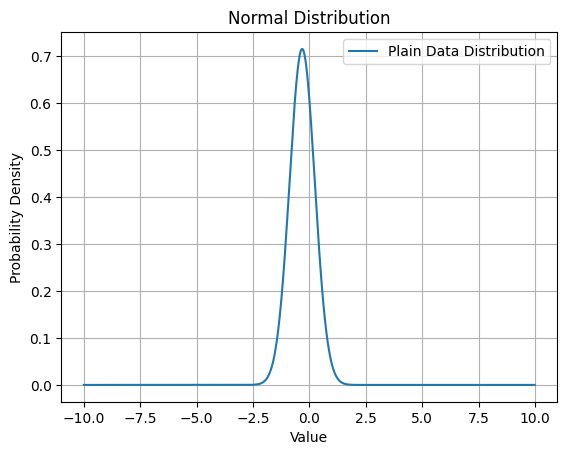

Distribution on encrypted data:


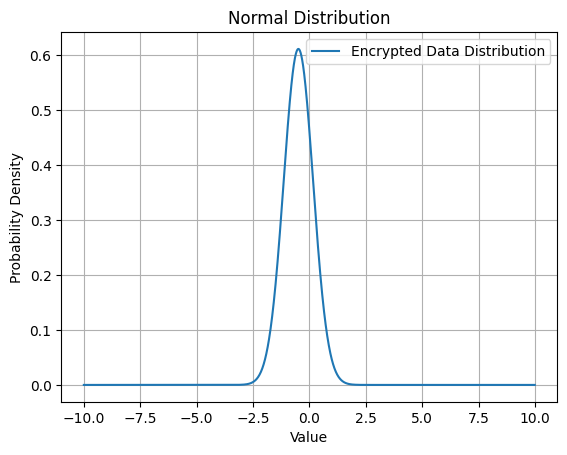

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Normal distribution function
normal_dist = lambda x, mean, var: np.exp(-np.square(x - mean) / (2 * var)) / np.sqrt(2 * np.pi * var)

def plot_normal_dist(mean, var, title, rmin=-10, rmax=10):
    x = np.arange(rmin, rmax, 0.01)
    y = normal_dist(x, mean, var)
    plt.plot(x, y, label=title)  # Use the title for the label in the legend
    plt.title('Normal Distribution')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.grid(True)  # Add grid for better readability
    plt.legend()  # Show legend

# Plain distribution
lr = LR(n_features)
data = lr.lr(x_test)
mean, var = map(float, [data.mean(), data.std() ** 2])
plot_normal_dist(mean, var, 'Plain Data Distribution')  # Label for plain data
print("Distribution on plain data:")
plt.show()

# Encrypted distribution
def encrypted_out_distribution(eelr, enc_x_test):
    w = eelr.weight
    b = eelr.bias
    data = []
    for enc_x in enc_x_test:
        enc_out = enc_x.dot(w) + b
        data.append(enc_out.decrypt())
    data = torch.tensor(data)
    mean, var = map(float, [data.mean(), data.std() ** 2])
    plot_normal_dist(mean, var, 'Encrypted Data Distribution')  # Label for encrypted data
    print("Distribution on encrypted data:")
    plt.show()

# Initialize and encrypt the model
eelr = EncryptedLR(lr)
eelr.encrypt(ctx_training)
encrypted_out_distribution(eelr, enc_x_train)

### Training Encrypted Model with Encrypted data


In [114]:
# Initialize the EncryptedLR model
eelr = EncryptedLR(LR(n_features))

# Initial accuracy before any training
initial_accuracy = eelr.plain_accuracy(x_test, y_test)
print(f"Initial accuracy (test data): {initial_accuracy}")

# List to keep track of training times
times = []
encrypted_accuracy_list = []
# Training loop
for epoch in range(EPOCHS):
    eelr.encrypt(ctx_training)

    t_start = time()
    for enc_x, enc_y in zip(enc_x_train, enc_y_train):
        enc_out = eelr.forward(enc_x)
        eelr.backward(enc_x, enc_out, enc_y)
    eelr.update_parameters()
    t_end = time()
    times.append(t_end - t_start)

    # Decrypt the final model outputs
    eelr.decrypt()
    # Calculate and print training accuracy for the current epoch

    train_accuracy = eelr.plain_accuracy(x_train, y_train)  # Get accuracy on training data
    encrypted_accuracy_list.append(train_accuracy)
    print(f"Training accuracy at epoch #{epoch + 1}: {train_accuracy}")

print(f"Training completed over {EPOCHS} epochs.")



Initial accuracy (test data): 0.5419161915779114
Training accuracy at epoch #1: 0.6769230961799622
Training accuracy at epoch #2: 0.6692307591438293
Training accuracy at epoch #3: 0.6717948913574219
Training accuracy at epoch #4: 0.6833333373069763
Training accuracy at epoch #5: 0.6769230961799622
Training completed over 5 epochs.


In [115]:
#Conversion of tensor list to numpy array
print(encrypted_accuracy_list)
encrypted_accuracy_list = np.array([tensor.numpy() for tensor in encrypted_accuracy_list])
print(encrypted_accuracy_list)

[tensor(0.6769), tensor(0.6692), tensor(0.6718), tensor(0.6833), tensor(0.6769)]
[0.6769231  0.66923076 0.6717949  0.68333334 0.6769231 ]


### Testing Encrypted Model

In [ ]:
def encrypted_evaluation(model, enc_x_test, y_test):
    t_start = time()

    correct = 0
    for enc_x, y in zip(enc_x_test, y_test):
        # encrypted evaluation
        enc_out = model(enc_x)
        # plain comparison
        out = enc_out.decrypt()
        out = torch.tensor(out)
        if torch.abs(out - y) < 0.5:
            correct += 1

    t_end = time()
    print(f"Evaluated test_set of {len(x_test)} entries in {int(t_end - t_start)} seconds")
    print(f"Accuracy: {correct}/{len(x_test)} = {correct / len(x_test)}")
    return correct / len(x_test)


encrypted_accuracy = encrypted_evaluation(eelr, enc_x_test, y_test)

diff_accuracy = plain_accuracy - encrypted_accuracy
print(f"Difference between plain and encrypted accuracies: {diff_accuracy}\n")

###  Comparison of Plain and Encrypted Model Accuracies

In [ ]:
import matplotlib.pyplot as plt

# Define the labels and values
labels = ['Plain Accuracy', 'Encrypted Accuracy']
accuracies = [plain_accuracy, encrypted_accuracy]

# Plotting the bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'lightcoral'])
plt.ylim(0, 1)  # Assuming accuracy ranges between 0 and 1

# Adding title and labels
plt.title('Comparison of Plain and Encrypted Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Type of Model')

# Adding accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

# Display the plot
plt.show()


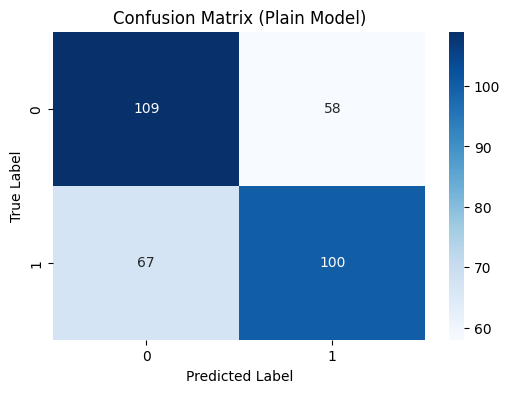

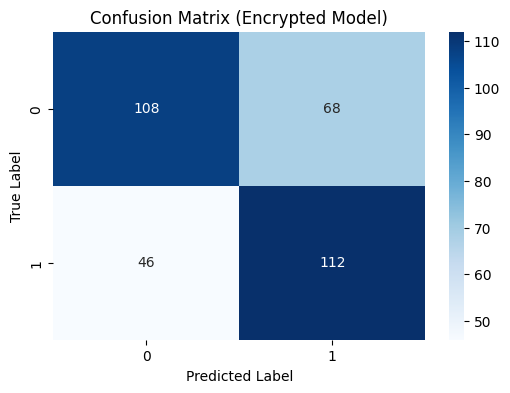

In [118]:
# prompt: write code for confusion matrix for both

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have y_test (true labels) and predicted labels from your model
# Replace these with your actual labels and predictions
y_true_plain = (model(x_test) > 0.5).int().numpy().flatten()
y_pred_plain = y_test.numpy().flatten()

y_true_encrypted = []
y_pred_encrypted = []

for enc_x, y in zip(enc_x_test, y_test):
  enc_out = eelr(enc_x)
  out = enc_out.decrypt()
  out = torch.tensor(out)
  y_true_encrypted.append(y.item())
  y_pred_encrypted.append(int(out > 0.5))

y_true_encrypted = np.array(y_true_encrypted)
y_pred_encrypted = np.array(y_pred_encrypted)

# Calculate confusion matrix for the plain model
cm_plain = confusion_matrix(y_true_plain, y_pred_plain)

# Calculate confusion matrix for the encrypted model
cm_encrypted = confusion_matrix(y_true_encrypted, y_pred_encrypted)


# Plot confusion matrix for the plain model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_plain, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Plain Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Plot confusion matrix for the encrypted model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_encrypted, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Encrypted Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Epoch-wise Comparison of Plain and Encrypted Model Training Accuracies

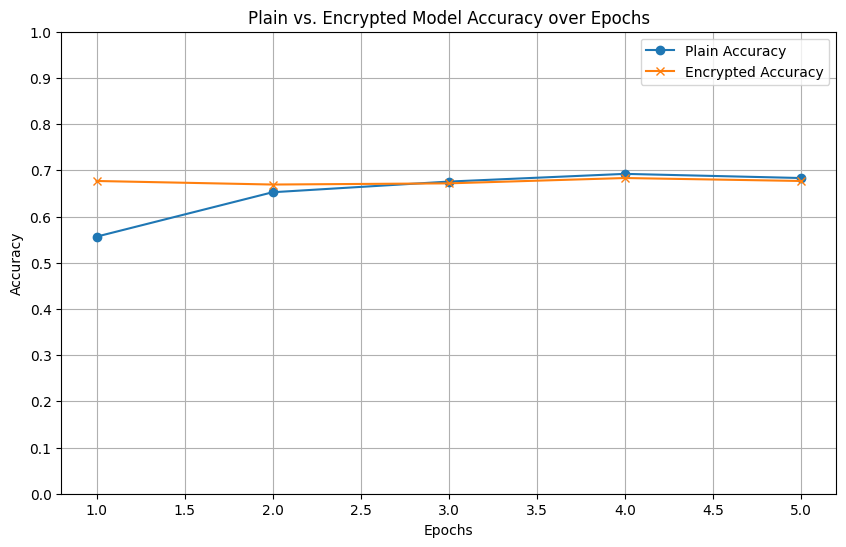

In [119]:
epochs = range(1, len(plain_accuracy_list) + 1)  # Generate epoch numbers

plt.figure(figsize=(10, 6))
plt.plot(epochs, plain_accuracy_list, label='Plain Accuracy', marker='o')
plt.plot(epochs, encrypted_accuracy_list, label='Encrypted Accuracy', marker='x')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plain vs. Encrypted Model Accuracy over Epochs')
plt.legend()
plt.grid(True)

# Decrease the y-axis spacing
plt.yticks(np.arange(0, 1.1, 0.1)) # Adjust the step as needed

plt.show()